In [1]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import datetime

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math
from math import log

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()


# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\12\Downloads\PORTEE SALES - SALES REPORT(2).csv")
df1 = pd.read_csv(r"C:\Users\12\Downloads\CONVERT JUBELIO TO DASHBOARD - Daftar Penjualan Barang.csv")
df2 = pd.read_csv(r"C:\Users\12\Downloads\Copy of CONVERT JUBELIO TO DASHBOARD - Daftar Penjualan Barang.csv")
df3 = pd.read_csv(r"CONVERT JUBELIO TO DASHBOARD - Daftar Penjualan Barang(8).csv")

C:\Users\12\AppData\Local\Temp\ipykernel_14312\2609430907.py:1: DtypeWarning:

Columns (3,24,25,27) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df1['Username'] = df1['Pelanggan']+df1['No Telp']
df1['Date'] = pd.to_datetime(df1['Tanggal'], errors='coerce')
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y %H:%M:%S')
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
df1['Date'] = pd.to_datetime(df1['Date'])

df2['Username'] = df2['Pelanggan']+df2['No Telp']
df2['Date'] = pd.to_datetime(df2['Tanggal'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')
df2['Date'] = pd.to_datetime(df2['Date'])

df3['Username'] = df3['Pelanggan']+df3['No Telp']
df3['Date'] = pd.to_datetime(df3['Tanggal'], errors='coerce')
df3['Date'] = pd.to_datetime(df3['Date'], format='%d-%m-%Y %H:%M:%S')
df3['Date'] = df3['Date'].dt.strftime('%Y-%m-%d')
df3['Date'] = pd.to_datetime(df3['Date'])

In [4]:
df1 = df1.loc[df1['Username'].str.contains('barudak nsi') == False]
df1 = df1.loc[df1['Username'].str.contains('Barudak NSI') == False]
df1 = df1.loc[df1['Username'].str.contains('cod') == False]
df1 = df1.loc[df1['Username'].str.contains('Pelanggan Umum') == False]
df1 = df1.loc[df1['Username'].str.contains('orderan pa yanto') == False]
df1 = df1.loc[df1['Username'].str.contains('Rani Fitriank6281284956014') == False]
df1 = df1.loc[df1['Nama Barang'].str.contains('Unique Code') == False]

df2 = df2.loc[df2['Username'].str.contains('barudak nsi') == False]
df2 = df2.loc[df2['Username'].str.contains('Barudak NSI') == False]
df2 = df2.loc[df2['Username'].str.contains('cod') == False]
df2 = df2.loc[df2['Username'].str.contains('Pelanggan Umum') == False]
df2 = df2.loc[df2['Username'].str.contains('orderan pa yanto') == False]
df2 = df2.loc[df2['Username'].str.contains('Rani Fitriank6281284956014') == False]
df2 = df2.loc[df2['Nama Barang'].str.contains('Unique Code') == False]


df3 = df3.loc[df3['Username'].str.contains('barudak nsi') == False]
df3 = df3.loc[df3['Username'].str.contains('Barudak NSI') == False]
df3 = df3.loc[df3['Username'].str.contains('cod') == False]
df3 = df3.loc[df3['Username'].str.contains('Pelanggan Umum') == False]
df3 = df3.loc[df3['Username'].str.contains('orderan pa yanto') == False]
df3 = df3.loc[df3['Username'].str.contains('Rani Fitriank6281284956014') == False]
df3 = df3.loc[df3['Nama Barang'].str.contains('Unique Code') == False]

# Explore KPI CRM

In [6]:
df3.head()

SKU                     Nama Barang  \
0  SSN1401BLK-PB-42  Mono Court RL Series All Black   
1  SSY0102BLK-DM-43            Original Derby Black   
4  PSD0648AGR-NN-41          Loom Sandal Army Green   
6  SSY2502BLK-DM-41      Original Derby Black Women   
7  PEQ2199BLK-NN-NN                       Shoe care   

                    No Pesanan            Tanggal  \
0                 SO-000075487  4/2/2024 13:31:00   
1                 SO-000075492  4/2/2024 13:35:00   
4                 SO-000075495  4/2/2024 13:39:00   
6                 SO-000075499  4/2/2024 13:46:00   
7  TT-576767934874814441-84986  4/2/2024 12:55:00   

                                     Pelanggan           No Telp  QTY  \
0                  Jody Kurniawan (tukar size)       87887654506  1.0   
1  Ilham Nurjaman/ilhamnurjaman99 (tukar size)       82121170615  1.0   
4                   Risma / Iqbal (Tukar size)  821127     09479  1.0   
6                    Gustu Alvaro (tukar size)        8123705285  1.0   
7                                        Dilla  (+62)81333123840  1.0   

   Harga Sebelum Diskon  Harga Setelah Diskon    Sumber     Nama Toko  \
0                   NaN                   0.0  INTERNAL  Toko Default   
1                   NaN                   0.0  INTERNAL  Toko Default   
4                   NaN                   0.0  INTERNAL  Toko Default   
6                   NaN                   0.0  INTERNAL  Toko Default   
7                   NaN                   0.0    TIKTOK  Portee Goods   

      Status     Catatan Harga Jual  Diskon  Extra Discount  \
0  COMPLETED  tukar size          0     0.0             0.0   
1  COMPLETED  tukar size          0     0.0             0.0   
4  COMPLETED  tukar size          0     0.0             0.0   
6  COMPLETED  tukar size          0     0.0             0.0   
7  COMPLETED         NaN          0     0.0             0.0   

                                            Username       Date  
0             Jody Kurniawan (tukar size)87887654506 2024-04-02  
1  Ilham Nurjaman/ilhamnurjaman99 (tukar size)821... 2024-04-02  
4         Risma / Iqbal (Tukar size)821127     09479 2024-04-02  
6                Gustu Alvaro (tukar size)8123705285 2024-04-02  
7                              Dilla(+62)81333123840 2024-04-02

In [7]:
dfx = df1.copy()
dfy = df2.copy()
dfw = df3.copy()


In [9]:
dfw = dfw.rename(columns={'Harga Setelah Diskon': 'amount'})

In [10]:
dfx = dfx.loc[dfx['amount']>0]
dfy = dfy.loc[dfy['amount']>0]
dfw = dfw.loc[dfw['amount']>0]
dfx['Qyear'] = pd.PeriodIndex(dfx.Date,freq="Q")
dfy['Qyear'] = pd.PeriodIndex(dfy.Date,freq="Q")
dfw['Qyear'] = pd.PeriodIndex(dfw.Date,freq="Q")



In [10]:

dfx = dfx.loc[(dfx['Qyear']=='2024Q1')]
dfy = dfy.loc[(dfy['Qyear']=='2023Q4')]
dfw = dfw.loc[(dfw['Qyear']=='2024Q2')]

dfz = pd.concat([dfx,dfy,dfw])
columns = dfz.columns
# dfz = dfz.drop_duplicates(subset=columns)
dfz = dfz.loc[(dfz['amount']>99000)]
dfz['Month'] = dfz['Date'].dt.month
dfz['Year'] = dfz['Date'].dt.year
dfz['dateInt']=dfz['Year'].astype(str) + dfz['Month'].astype(str).str.zfill(2)
dfz['year month'] = pd.to_datetime(dfz['dateInt'], format='%Y%m')
dfz = dfz.loc[dfz['Sumber'].str.contains('INTERNAL') == False]
dfz = dfz.loc[dfz['amount']>0]

In [ ]:
max = dfz.groupby(['Username']).Date.max().reset_index()
min = dfz.groupby(['Username']).Date.min().reset_index()
fr = dfz.groupby(['Username'])['No Pesanan'].nunique().reset_index()

dfzz = pd.merge(min,max, how='outer', on=['Username'])
dfzz = pd.merge(fr,dfzz, how='outer', on=['Username'])

dfzz['Qyear1'] = pd.PeriodIndex(dfzz.Date_x,freq="Q")
dfzz['Qyear2'] = pd.PeriodIndex(dfzz.Date_y,freq="Q")

ren = dfzz.loc[dfzz['No Pesanan']>1]
ren1 = ren.loc[(ren['Qyear1']=='2023Q4')&(ren['Qyear2']=='2024Q1')]
ren2 = ren.loc[(ren['Qyear1']=='2023Q4')&(ren['Qyear2']=='2023Q4')]
ren3 = ren.loc[(ren['Qyear1']=='2024Q1')&(ren['Qyear2']=='2024Q1')]

In [25]:
ren4 = pd.concat([ren1,ren3])
aa = ren4['Username']

In [26]:
ren5 = dfz[dfz['Username'].isin(aa)]

In [27]:
df2 = dfz.copy()
df22 = df2.loc[(df2['Date']>'2023-09-30')&(df2['Date']<'2024-04-01')]

recency22 = df22.groupby(['Username']).Date.max().reset_index()
recency22['Recency'] = recency22['Date'] - pd.Timestamp.today()
recency22['Recency'] = recency22['Recency'].dt.days
recency22['Recency'] = recency22['Recency']*-1

frequncy22 = df22.groupby(['Username'])['No Pesanan'].nunique().reset_index()

m22 = pd.merge(recency22,frequncy22, how='outer', on=['Username'])

In [28]:
df3 = dfz.copy()
df33 = df3.loc[(df3['Date']>'2023-09-30')&(df3['Date']<'2024-04-01')]

recency33 = df33.groupby(['Username']).Date.max().reset_index()
recency33['Recency'] = recency33['Date'] - pd.Timestamp.today()
recency33['Recency'] = recency33['Recency'].dt.days
recency33['Recency'] = recency33['Recency']*-1

frequncy33 = df33.groupby(['Username'])['No Pesanan'].nunique().reset_index()

m33 = pd.merge(recency33,frequncy33, how='outer', on=['Username'])

In [ ]:
dfz['Date'].min()

Timestamp('2023-10-01 00:00:00')

In [ ]:
dfz['Date'].max()

Timestamp('2024-05-28 00:00:00')

In [8]:
dff = dfz.loc[(dfz['Date']>'2023-09-30')]

In [9]:
recency = dff.groupby(['Username']).Date.max().reset_index()
recency['Recency'] = recency['Date'] - pd.Timestamp.today()
recency['Recency'] = recency['Recency'].dt.days
recency['Recency'] = recency['Recency']*-1

frequncy = dff.groupby(['Username'])['No Pesanan'].nunique().reset_index()

monetary = dff.groupby(['Username'])['amount'].sum().reset_index()

In [10]:
m1 = pd.merge(recency,frequncy, how='outer', on=['Username'])
m2 = pd.merge(m1,monetary, how='outer', on=['Username'])

In [11]:
mss  = m2[['Username','Recency','No Pesanan','amount']]

In [12]:
m2a  = m2[['Username','Recency','No Pesanan','amount']]

In [13]:
m3  = m2[['Username','Recency','No Pesanan','amount']]

In [16]:
mss.sort_values(by='Recency')

Username  Recency  No Pesanan    amount
14682  Fatimah zahro/Teti rusmiati6289505688299        1           1  328800.0
23966                     Mas Abee6281226091946        1           1  358700.0
21555                     Khodijah6281292265520        1           1  358700.0
13301                     F***h(+62)812******40        1           1  369500.0
6275                         Astya6281911770151        1           1  328800.0
...                                         ...      ...         ...       ...
28510         Novrizal*********0239 - 115327138      247           1  326000.0
32989                 Rifki******51 - 123228912      247           1  299000.0
11203                 Dimas******50 - 794165490      247           1  299000.0
11178    Dimas Yoga Pratama******89 - 675742479      247           1  326000.0
13847          Faiq Alfalis******57 - 148161619      247           1  326000.0

[47209 rows x 4 columns]

# RFM METHOD 1

In [99]:
m3['R_rank'] = m3['Recency'].rank(ascending=False)
m3['F_rank'] = m3['No Pesanan'].rank(ascending=True)
m3['M_rank'] = m3['amount'].rank(ascending=True)
 
# normalizing the rank of the customers
m3['R_rank_norm'] = (m3['R_rank']/m3['R_rank'].max())*100
m3['F_rank_norm'] = (m3['F_rank']/m3['F_rank'].max())*100
m3['M_rank_norm'] = (m3['F_rank']/m3['M_rank'].max())*100
 
m3.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
m3.head()

Username  Recency  No Pesanan  \
0                      ( Vina )******20 - 158487923       40           1   
1           (Guru Kimia) Anis Mugitsah6287833388350       24           1   
2  (Hanny.Fuji - Adm Security)******29 - 1109949619       49           1   
3       (Kuaro) Tita Erlanggawati******78 - 9457485      194           1   
4             (Ramdhan) Rudi/Ela******95 - 32361929      152           1   

     amount  R_rank_norm  F_rank_norm  M_rank_norm  
0  167000.0    80.058774    48.152432    48.152432  
1  319000.0    89.224058    48.152432    48.152432  
2  274000.0    70.562757    48.152432    48.152432  
3  299000.0    10.075567    48.152432    48.152432  
4  326000.0    26.836436    48.152432    48.152432

In [109]:
m3['RFM_Score'] = 0.20*m3['R_rank_norm']+0.30*m3['F_rank_norm']+0.50*m3['M_rank_norm']
m3['RFM_Score'] *= 0.05
m3 = m3.round(2)
m3[['Username', 'RFM_Score']].head(7)

Username  RFM_Score
0                      ( Vina )******20 - 158487923       2.73
1           (Guru Kimia) Anis Mugitsah6287833388350       2.82
2  (Hanny.Fuji - Adm Security)******29 - 1109949619       2.63
3       (Kuaro) Tita Erlanggawati******78 - 9457485       2.03
4             (Ramdhan) Rudi/Ela******95 - 32361929       2.19
5              (SIMRS) Alfie Fadhillah6285246886995       2.79
6                * k*k ya n*a p*™a(+62)087761476753       2.40

In [110]:
m3["Customer_segment"] = np.where(m3['RFM_Score'] >
									4.5, "Top Customers",
									(np.where(
										m3['RFM_Score'] > 4,
										"High value Customer",
										(np.where(
	m3['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(m3['RFM_Score'] > 1.6,
							'Low Value Customers', 'Lost Customers'))))))
m3[['Username', 'RFM_Score', 'Customer_segment']].head(20)


Username  RFM_Score  \
0                       ( Vina )******20 - 158487923       2.73   
1            (Guru Kimia) Anis Mugitsah6287833388350       2.82   
2   (Hanny.Fuji - Adm Security)******29 - 1109949619       2.63   
3        (Kuaro) Tita Erlanggawati******78 - 9457485       2.03   
4              (Ramdhan) Rudi/Ela******95 - 32361929       2.19   
5               (SIMRS) Alfie Fadhillah6285246886995       2.79   
6                 * k*k ya n*a p*™a(+62)087761476753       2.40   
7                        **********70862895433600708       4.31   
8                          *********0416283879003159       1.96   
9                          *********1336287884115133       2.21   
10                         *********4276285882319427       2.06   
11                         *********4666281339821466       2.03   
12                         *********4736285264201473       2.09   
13                         *********5006289678436500       2.21   
14                         *********7806285172226780       2.22   
15                         *********9686281286291995       2.21   
16                          ********4526285718623134       1.93   
17                          ********4736288707632473       2.11   
18                           *N*1A*n(+62)89638684948       2.47   
19                           *a*h*h(+62)082*******24       2.80   

       Customer_segment  
0   Low Value Customers  
1   Low Value Customers  
2   Low Value Customers  
3   Low Value Customers  
4   Low Value Customers  
5   Low Value Customers  
6   Low Value Customers  
7   High value Customer  
8   Low Value Customers  
9   Low Value Customers  
10  Low Value Customers  
11  Low Value Customers  
12  Low Value Customers  
13  Low Value Customers  
14  Low Value Customers  
15  Low Value Customers  
16  Low Value Customers  
17  Low Value Customers  
18  Low Value Customers  
19  Low Value Customers

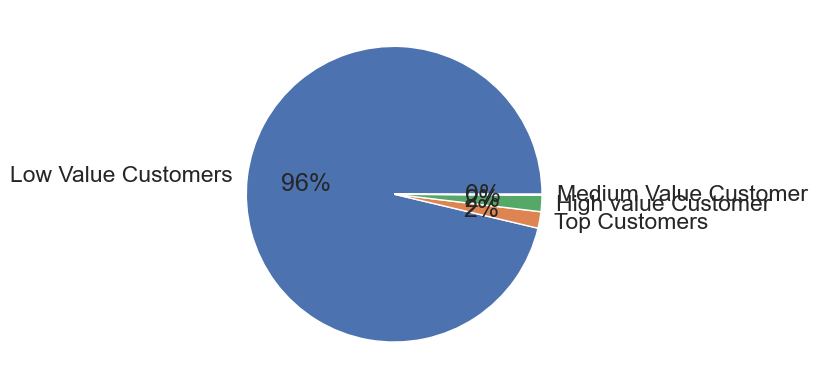

In [111]:
plt.pie(m3.Customer_segment.value_counts(),
        labels=m3.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [112]:
m3['Customer_segment'].value_counts()

Customer_segment
Low Value Customers      47042
Top Customers              880
High value Customer        868
Medium Value Customer       58
Name: count, dtype: int64

# RFM METHOD 2

In [58]:
m2a['recency_log'] = m2a['Recency'].apply(math.log)
m2a['frequency_log'] = m2a['No Pesanan'].apply(math.log)
m2a['Sub_Total_log'] = m2a['amount'].apply(math.log)

In [114]:
feature_vector = ['Sub_Total_log', 'recency_log','frequency_log']
X_subset = m2a[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

count          mean      std        min       25%       50%  \
Sub_Total_log  48848.0 -7.082154e-15  1.00001 -14.761096 -0.425982 -0.208573   
recency_log    48848.0 -5.236558e-16  1.00001  -4.689074 -0.595690  0.292370   
frequency_log  48848.0 -1.425507e-17  1.00001  -0.191918 -0.191918 -0.191918   

                    75%        max  
Sub_Total_log  0.068693  10.739478  
recency_log    0.780302   1.159901  
frequency_log -0.191918  14.407604

In [115]:
m2a

Username  Recency  No Pesanan  \
0                          ( Vina )******20 - 158487923       40           1   
1               (Guru Kimia) Anis Mugitsah6287833388350       24           1   
2      (Hanny.Fuji - Adm Security)******29 - 1109949619       49           1   
3           (Kuaro) Tita Erlanggawati******78 - 9457485      194           1   
4                 (Ramdhan) Rudi/Ela******95 - 32361929      152           1   
...                                                 ...      ...         ...   
48843     | made pasek juni ariawan******32 - 127352467       34           1   
48844               | putu rustawan******80 - 100653329       90           1   
48845                                |*(+62)82311661209       13           1   
48846                          |*4 H*h(+62)082338165254       83           1   
48847                             “******23 - 275470785      222           1   

         amount  recency_log  frequency_log  Sub_Total_log  
0      167000.0     3.688879            0.0      12.025749  
1      319000.0     3.178054            0.0      12.672946  
2      274000.0     3.891820            0.0      12.520883  
3      299000.0     5.267858            0.0      12.608199  
4      326000.0     5.023881            0.0      12.694653  
...         ...          ...            ...            ...  
48843  338000.0     3.526361            0.0      12.730801  
48844  326000.0     4.499810            0.0      12.694653  
48845  319000.0     2.564949            0.0      12.672946  
48846  301000.0     4.418841            0.0      12.614866  
48847  326000.0     5.402677            0.0      12.694653  

[48848 rows x 7 columns]

<Axes: xlabel='No Pesanan', ylabel='amount'>

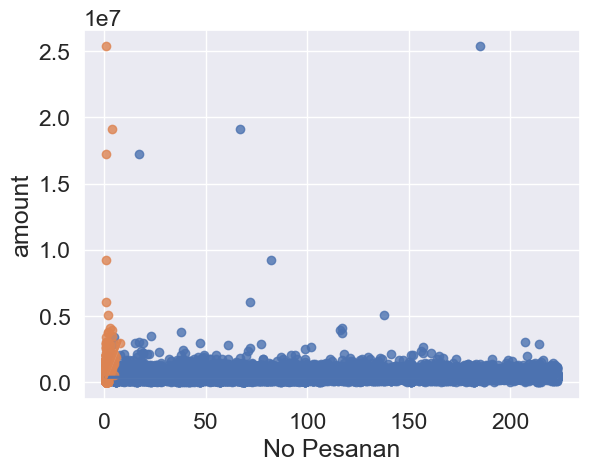

In [116]:
sns.regplot(data=m2a, x='Recency', y='amount')
sns.regplot(data=m2a, x='No Pesanan', y='amount')

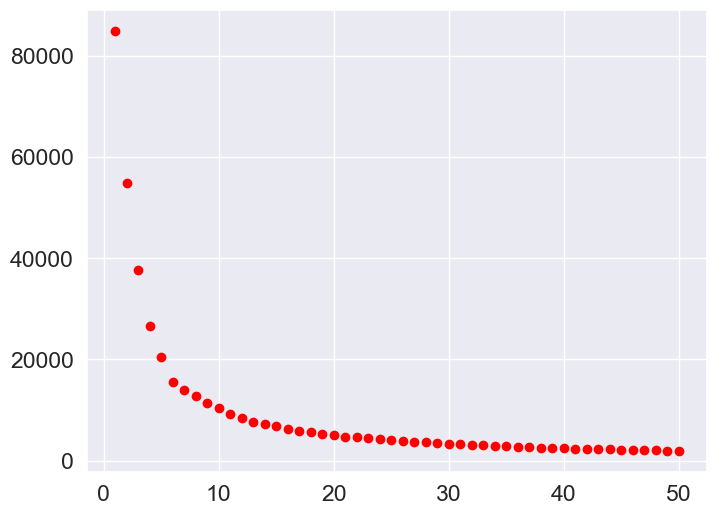

The best K sugest:  7


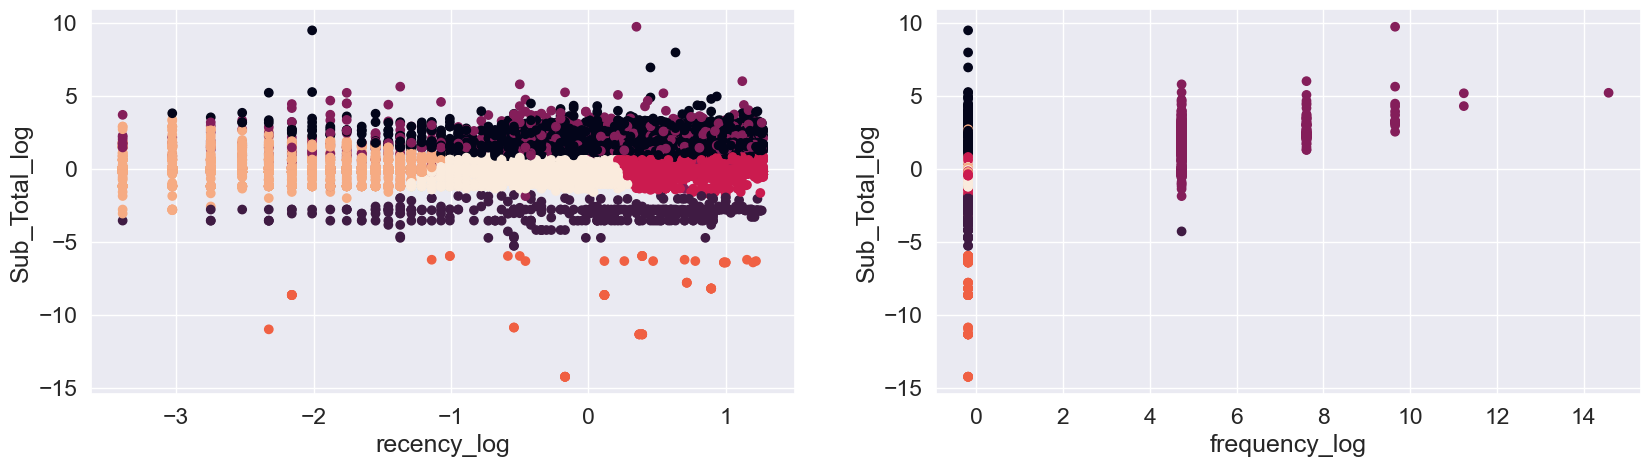

In [122]:
cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()


In [123]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })
    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10

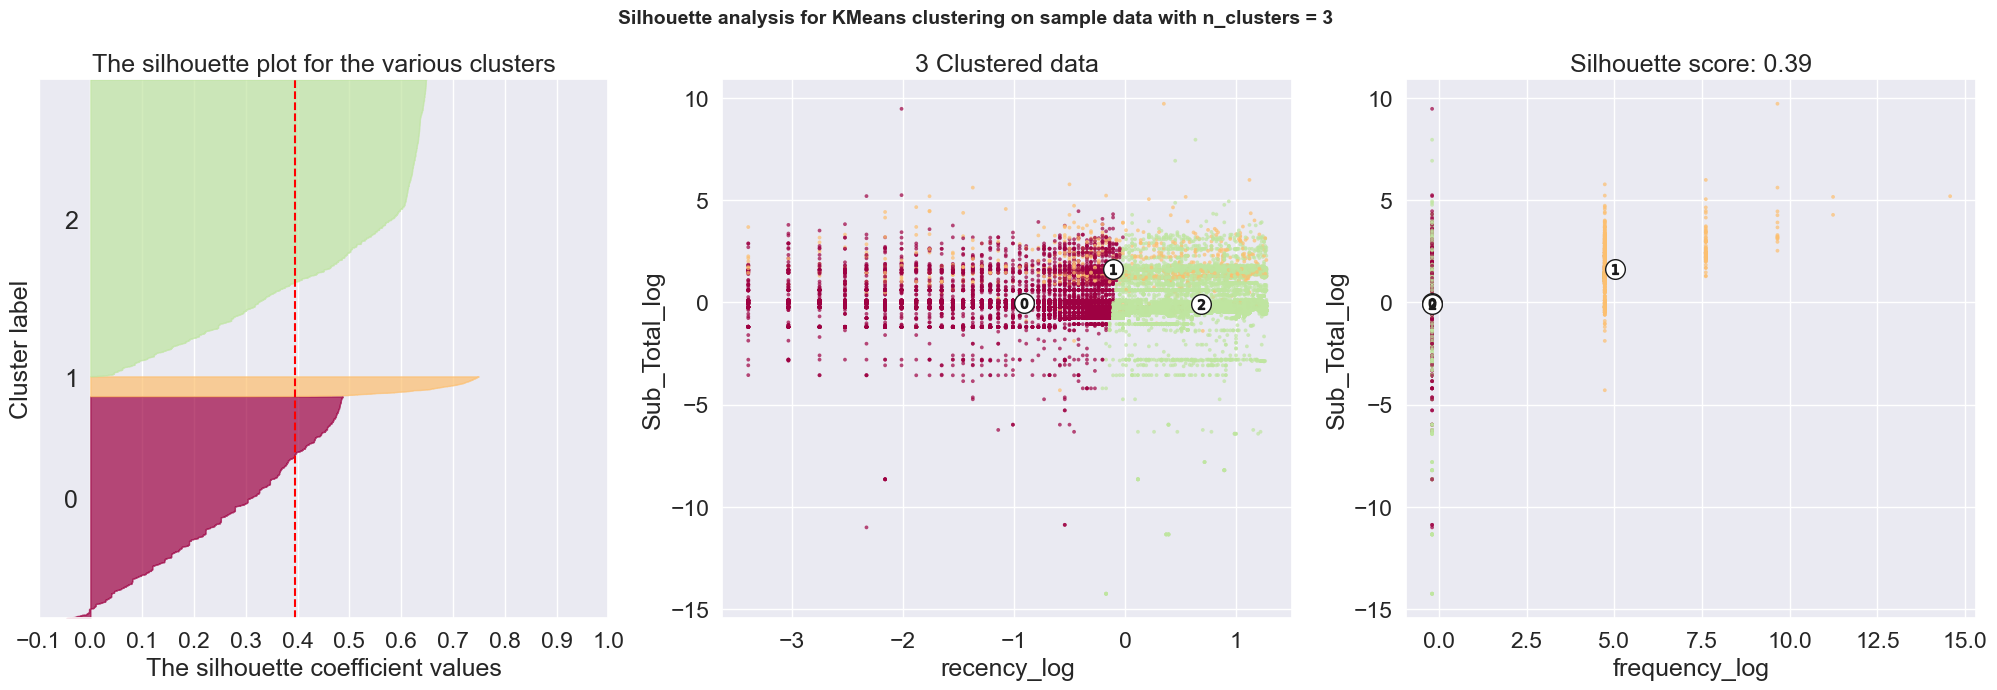

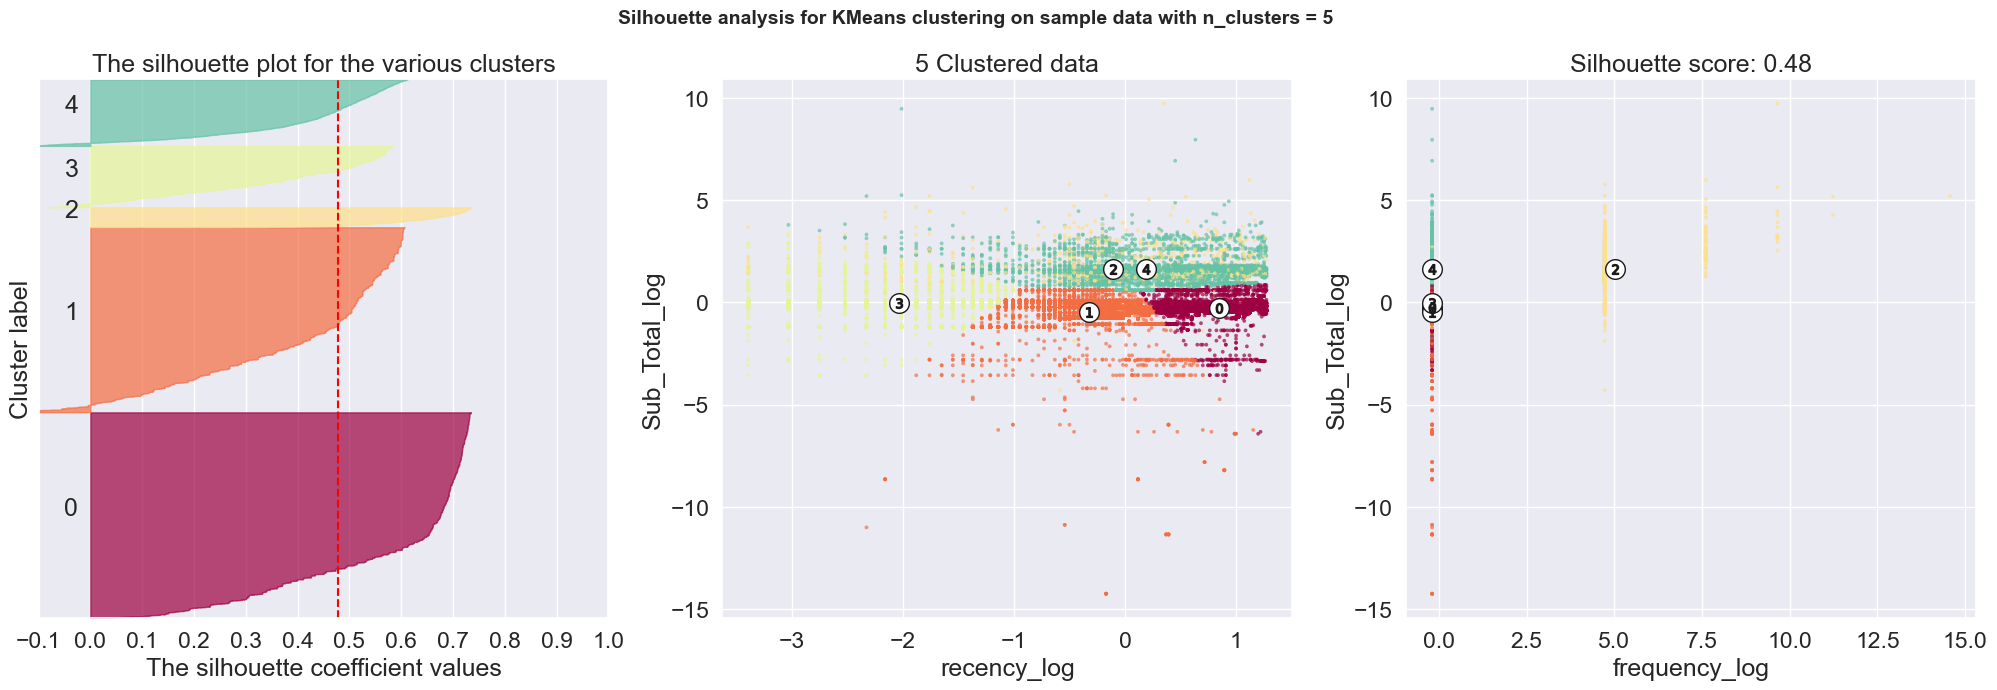

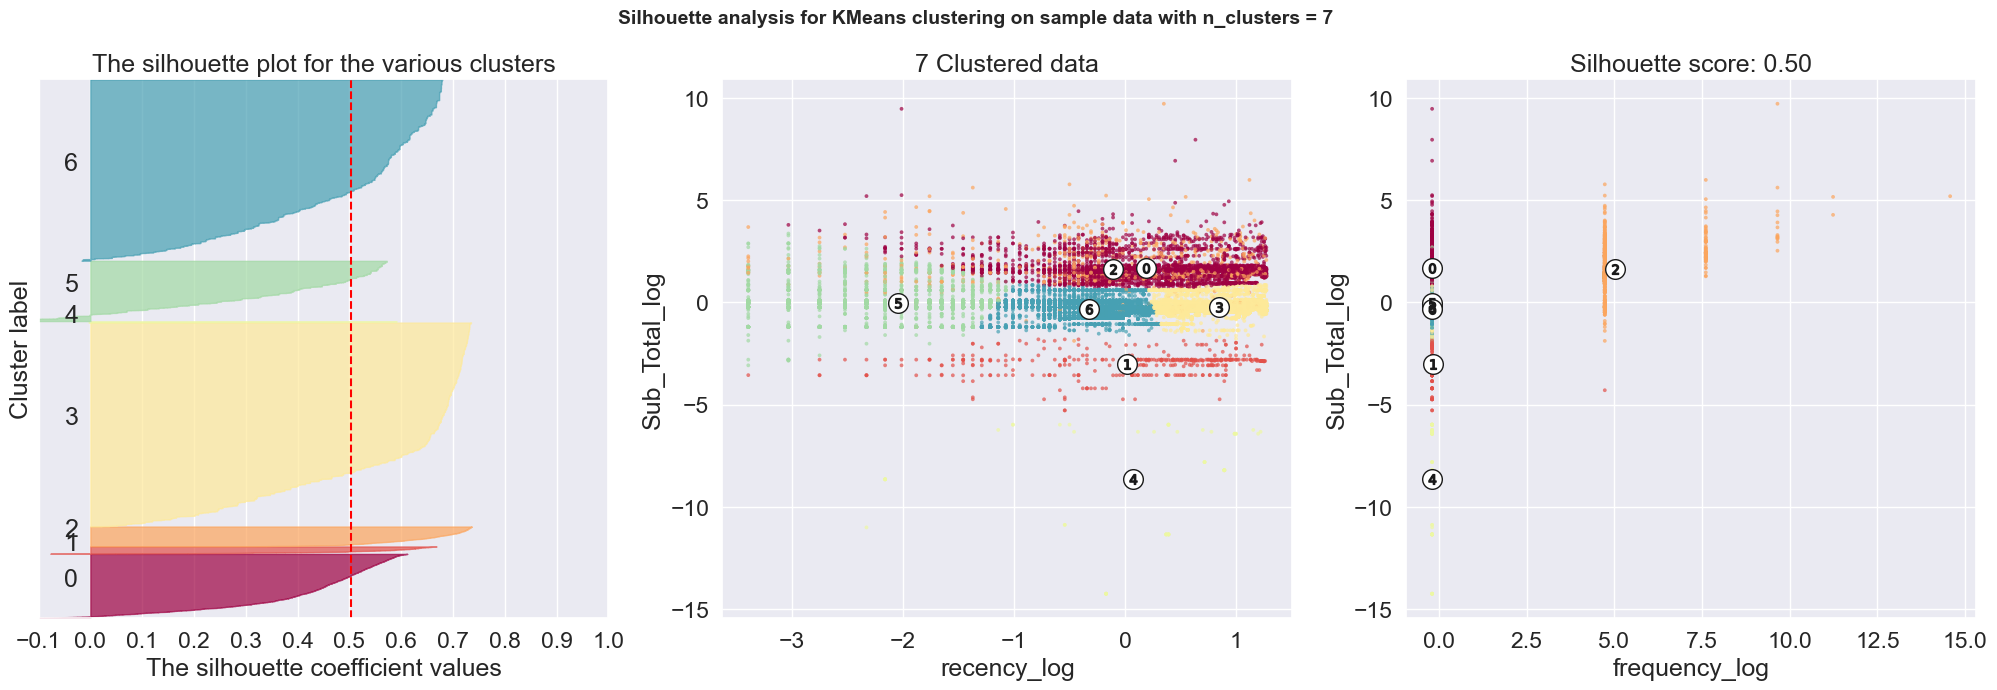

In [128]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })
    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)

    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [ ]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })
    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)

    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [127]:
features = ['amount',  'recency',  'frequency']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.39
Centers of each cluster:
          amount    recency  frequency
0  345950.732708  21.630503   1.000000
1  685704.483501  40.963622   2.084115
2  338521.127018  77.174286   1.000000
--------------------------------------------------
for 5 clusters the silhouette score is 0.48
Centers of each cluster:
          amount    recency  frequency
0  313279.234260  87.494136   1.000000
1  291159.916370  34.481871   1.000000
2  685704.483501  40.963622   2.084115
3  346069.898404   8.852613   1.000000
4  689736.729494  51.736597   1.000000
--------------------------------------------------
for 7 clusters the silhouette score is 0.50
Centers of each cluster:
          amount    recency  frequency
0  699618.026844  52.019227   1.000000
1  102702.758701  45.415792   1.001816
2  687311.017864  40.978596   2.084197
3  317193.572947  87.356090   1.000000
4   10141.290371  47.292745   1.000000
5  346249.365386   8.798428   1.000000
6  307751.549019  34.407437 

Username  Recency  No Pesanan  \
0                      ( Vina )******20 - 158487923       32           1   
1           (Guru Kimia) Anis Mugitsah6287833388350       16           1   
2  (Hanny.Fuji - Adm Security)******29 - 1109949619       41           1   
3              (SIMRS) Alfie Fadhillah6285246886995       23           1   
4                * k*k ya n*a p*™a(+62)087761476753       99           1   

     amount  recency_log  frequency_log  Sub_Total_log  clusters_3  \
0  167000.0     3.465736            0.0      12.025749           0   
1  319000.0     2.772589            0.0      12.672946           0   
2  274000.0     3.713572            0.0      12.520883           2   
3  364000.0     3.135494            0.0      12.804909           0   
4  449000.0     4.595120            0.0      13.014778           2   

   clusters_5  clusters_7  
0           1           1  
1           3           5  
2           1           6  
3           1           6  
4           0           3

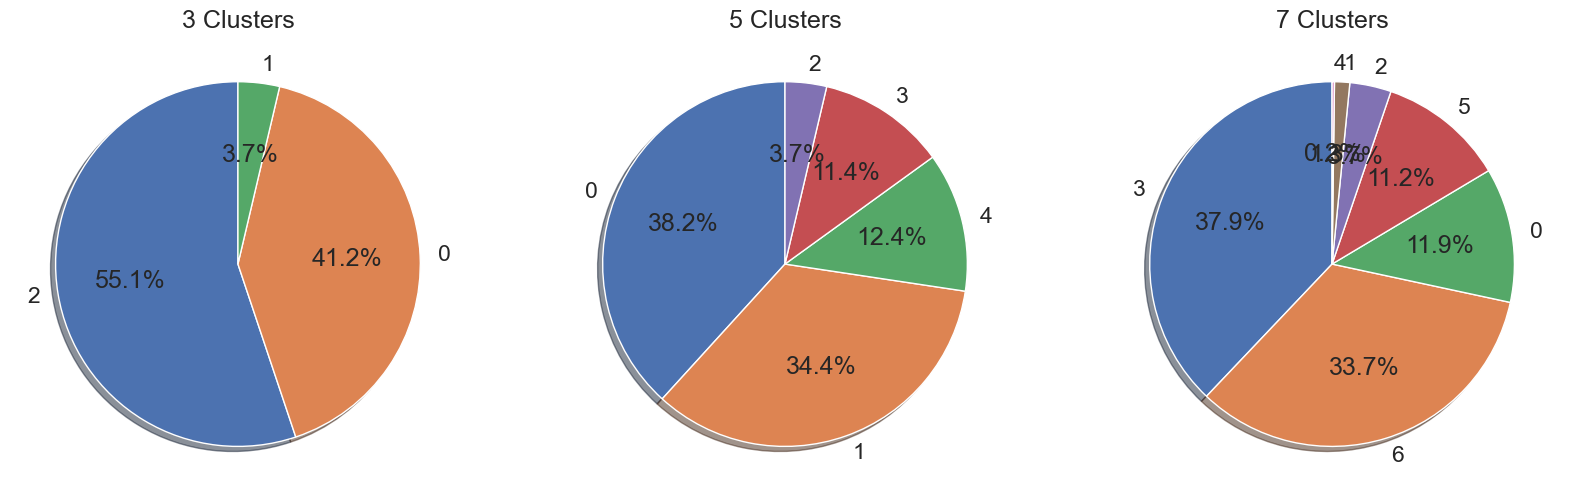

In [130]:
m2a['clusters_3'] = cluster_centers[3]['labels'] 
m2a['clusters_5'] = cluster_centers[5]['labels']
m2a['clusters_7'] = cluster_centers[7]['labels']
# m2a['clusters_9'] = cluster_centers[9]['labels']
display(m2a.head())

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = m2a.clusters_3.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')
f1 = fig.add_subplot(132)
market = m2a.clusters_5.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
f1 = fig.add_subplot(133)
market = m2a.clusters_7.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('7 Clusters')
plt.show()

In [131]:
m2a.loc[m2a['clusters_7']==2]

Username  Recency  No Pesanan     amount  \
11                8117784510628117784510       14           2   533000.0   
125                  A*a(+62)81219565912      106           3   852000.0   
150              A*k S*4(+62)81222227768       79           2   598000.0   
217        ABDULLAH BA’AGIL6289604349445       52           2   316000.0   
223             ABIE******18 - 120394296       63           2   948000.0   
...                                  ...      ...         ...        ...   
29199    wiranto tri******90 - 680705891       37           2  1146000.0   
29282  yudha kurnia******56 - 1033218164      115           2   647000.0   
29284            yudho p(+62)87842247085       55           2   588000.0   
29359     ziyan nabil jd(+62)89524540421       70           2   617000.0   
29368         zull arsil(+62)81340987560       31           2   638000.0   

       recency_log  frequency_log  Sub_Total_log  clusters_3  clusters_5  \
11        2.639057       0.693147      13.186277           1           2   
125       4.663439       1.098612      13.655342           1           2   
150       4.369448       0.693147      13.301346           1           2   
217       3.951244       0.693147      12.663497           1           2   
223       4.143135       0.693147      13.762110           1           2   
...            ...            ...            ...         ...         ...   
29199     3.610918       0.693147      13.951788           1           2   
29282     4.744932       0.693147      13.380102           1           2   
29284     4.007333       0.693147      13.284482           1           2   
29359     4.248495       0.693147      13.332624           1           2   
29368     3.433987       0.693147      13.366094           1           2   

       clusters_7  
11              2  
125             2  
150             2  
217             2  
223             2  
...           ...  
29199           2  
29282           2  
29284           2  
29359           2  
29368           2  

[1041 rows x 10 columns]

In [83]:
df23.loc[df23['Customer']=='wulandari']

Outlet             Number   Customer   Sales       Date   Time  \
113908  Online  SP-240425MXWJ897S  wulandari  PORTEE 2024-04-25  17:26   

            Category  Periode      Product Code                  Variant  \
113908  Cork Sandals   2404.0  PSD0631BLK-BS-42  London Black Sandal(42)   

                    Code  Quantity  UnitCost  UnitPrice  \
113908  PSD0631BLK-BS-42       1.0  149800.0   327000.0   

        ItemDiscountPersentage  ItemDiscountAmount  OrderDiscountPresentage  \
113908                     NaN            317000.0                      NaN   

        OrderDiscountAmount  OrderDiscount2Persentage  OrderDiscount2Amount  \
113908                  NaN                       NaN                   NaN   

        OrderDiscount3Amount  Gross Sales  Net Sales  Surcharge Item Note  \
113908                   NaN     327000.0    10000.0        NaN       NaN   

       Invoice Note                  Created By Modified By Sales Type  \
113908          NaN  Portee Goods Official Shop         NaN     Normal   

        Promotion Coupon         Product Name KATEGORI CLASSS CLUSTER PRICE  \
113908               NaN  London Black Sandal               B     200 - 399   

       SHOES/NON SHOES CHANNEL  SIZE GENDER  
113908         SANDALS  SHOPEE  (42)    MAN

# RFM METHOD 3

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [60]:
# Rescaling Atribute
rfm_df = mss[['Recency', 'No Pesanan', 'amount']]

# Instantiate
xscaler = preprocessing.StandardScaler().fit(rfm_df)
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Amount']


In [16]:
kmeans = KMeans(n_clusters=4, max_iter=300)
kmeans = kmeans.fit(rfm_df_scaled)
new_centers = xscaler.inverse_transform(kmeans.cluster_centers_)
new_centers = pd.DataFrame(new_centers)
new_centers = new_centers.apply(np.int64)
new_centers = new_centers.rename(columns={0: "Recency", 1: "Frequency", 2: "Amount"})
new_centers


c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Recency  Frequency  Amount
0       91          0  318793
1      186          0  320313
2      125          2  785199
3      143          1  758170

In [39]:
mss['labels'] = kmeans.labels_

<Axes: xlabel='Recency', ylabel='amount'>

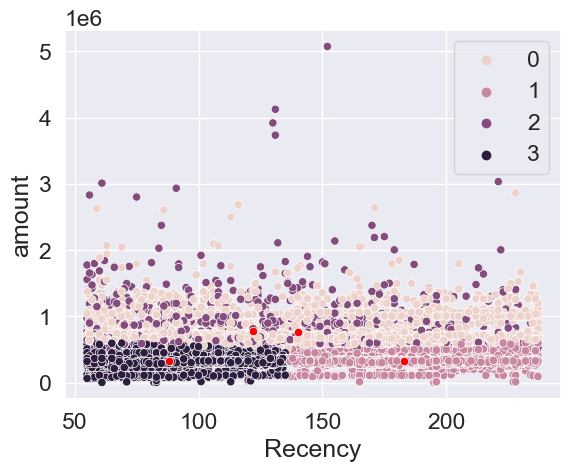

In [43]:
sns.scatterplot(data=mss,x='Recency',y='amount',hue='labels')
sns.scatterplot(data=new_centers,x='Recency',y='Amount',c='Red')


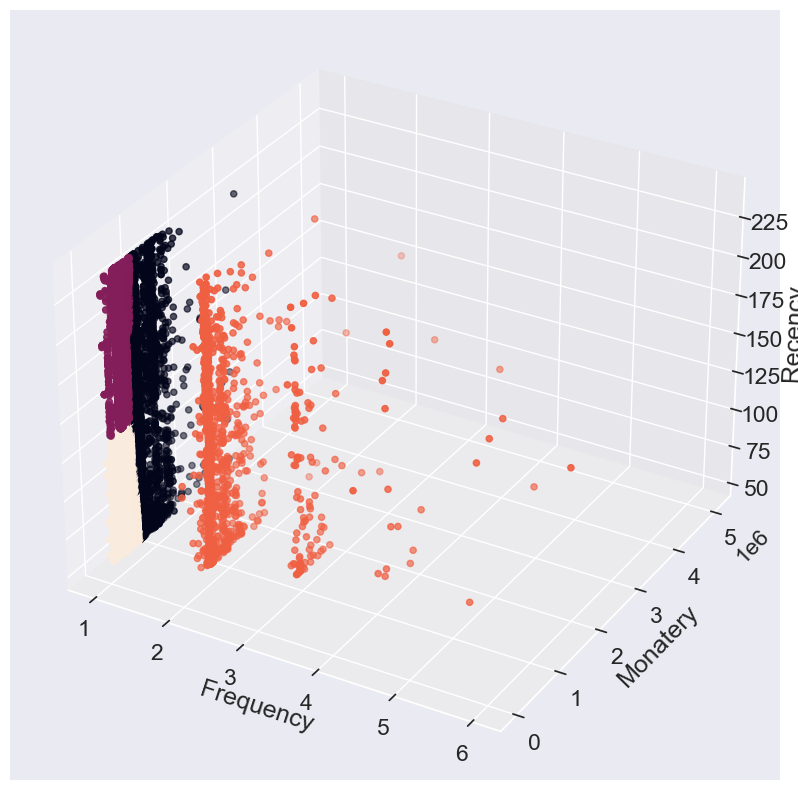

In [47]:
# Creating dataset
z = mss['Recency']
x = mss['No Pesanan']
y = mss['amount']

# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, c=mss['labels'])
ax.set_ylabel('Monatery')
ax.set_xlabel('Frequency')
ax.set_zlabel('Recency')
# show plot
plt.show()

In [144]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# plt.plot(ssd)

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

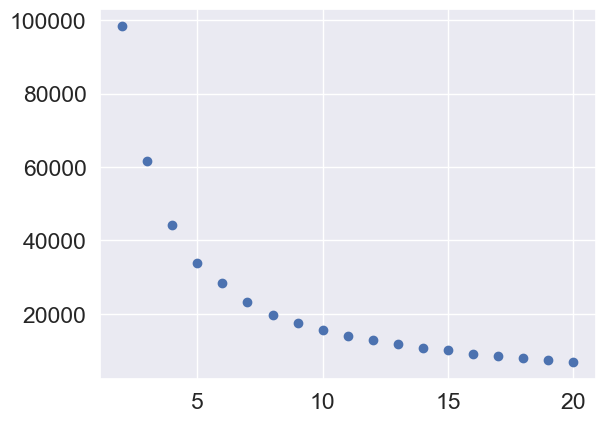

In [29]:
plt.scatter(range (2, 21),ssd)

In [14]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300, random_state=101)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=2, the silhouette score is 0.7345385614980046


c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=3, the silhouette score is 0.4797381917298633


c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=4, the silhouette score is 0.5370537225426615


c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=5, the silhouette score is 0.48689674968819546


c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=6, the silhouette score is 0.48918921076274613


In [30]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=101)
kmeans.fit(rfm_df_scaled)
cluster_labels = kmeans.labels_

# Silhouette Score
silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(4, silhouette_avg))

if silhouette_avg > 0.5 :
    print('algrithm OK!')
else :
    print("Please recheck you'r algorithm")

new_centers = xscaler.inverse_transform(kmeans.cluster_centers_)
new_centers = pd.DataFrame(new_centers.round(0))
new_centers = new_centers.apply(np.int64)
new_centers


c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters=4, the silhouette score is 0.5370537225426615
algrithm OK!


In [36]:
pd.DataFrame(cluster_labels)

0
0      0
1      1
2      1
3      0
4      1
...   ..
38815  0
38816  1
38817  0
38818  0
38819  1

[38820 rows x 1 columns]

In [35]:
mss

Username  Recency  No Pesanan  \
0      (Hanny.Fuji - Adm Security)******29 - 1109949619       60           1   
1           (Kuaro) Tita Erlanggawati******78 - 9457485      205           1   
2                 (Ramdhan) Rudi/Ela******95 - 32361929      163           1   
3                    * k*k ya n*a p*™a(+62)087761476753      118           1   
4                           **********70862895433600708      193           1   
...                                                 ...      ...         ...   
38815  | Wayan Wira Yudha Kristiawan******36 - 44586636      110           1   
38816  | gusti ngurah dimas widnyana******21 - 89947515      158           1   
38817               | putu rustawan******80 - 100653329      101           1   
38818                          |*4 H*h(+62)082338165254       94           1   
38819                             “******23 - 275470785      233           1   

         amount  
0      274000.0  
1      299000.0  
2      326000.0  
3      449000.0  
4      241273.0  
...         ...  
38815  299000.0  
38816  299000.0  
38817  326000.0  
38818  301000.0  
38819  326000.0  

[38820 rows x 4 columns]

In [43]:
mss['Labels'] = kmeans.labels_

In [44]:
mss = mss[['Username','Labels']]
mss

Username  Labels
0      (Hanny.Fuji - Adm Security)******29 - 1109949619       0
1           (Kuaro) Tita Erlanggawati******78 - 9457485       1
2                 (Ramdhan) Rudi/Ela******95 - 32361929       1
3                    * k*k ya n*a p*™a(+62)087761476753       0
4                           **********70862895433600708       1
...                                                 ...     ...
38815  | Wayan Wira Yudha Kristiawan******36 - 44586636       0
38816  | gusti ngurah dimas widnyana******21 - 89947515       1
38817               | putu rustawan******80 - 100653329       0
38818                          |*4 H*h(+62)082338165254       0
38819                             “******23 - 275470785       1

[38820 rows x 2 columns]

In [46]:
dff['Date'].max()

Timestamp('2024-03-31 00:00:00')

In [ ]:
dffa = dff[['']]

<Axes: xlabel='Recency'>

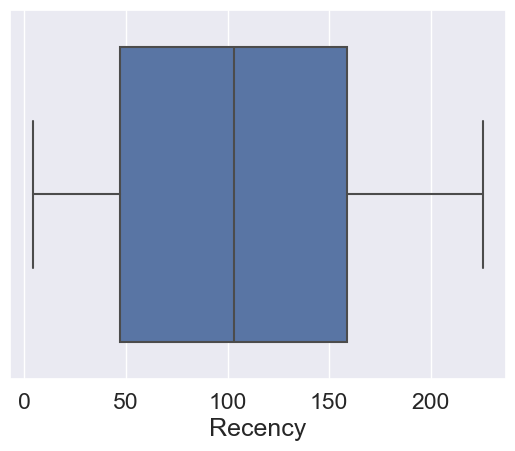

In [128]:
sns.boxplot(x=mss['Recency'])


<Axes: xlabel='No Pesanan'>

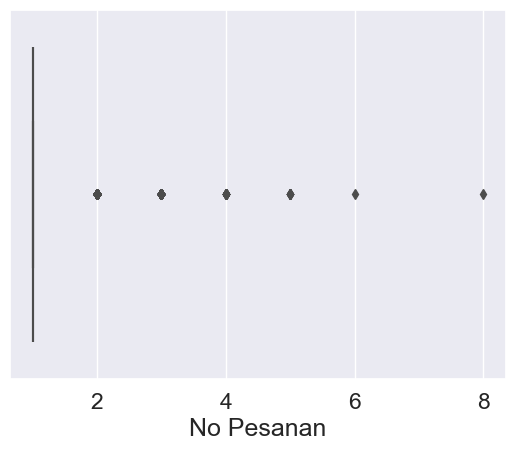

In [129]:
sns.boxplot(x=mss['No Pesanan'])


<Axes: xlabel='amount'>

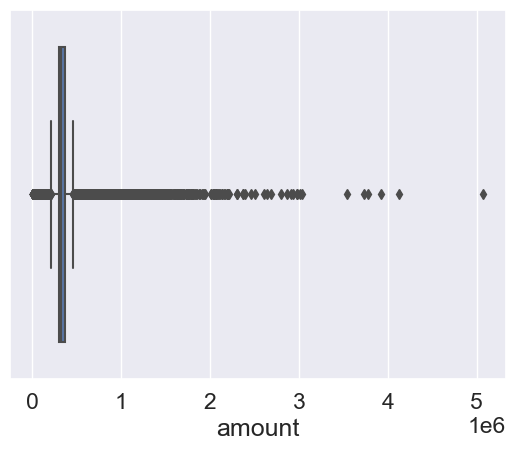

In [130]:
sns.boxplot(x=mss['amount'])


In [118]:
mss.sort_values(by='amount', ascending=False)

Username  Recency  No Pesanan  \
32410                        Rani Fitriank6281284956014       70           4   
20012                          Insan******52 - 45520950      141           2   
40455                        Wahyu Hidayat6281286165577      120           3   
13141            Endru Adhikara*********1136 - 38714333      119           4   
8532                  Cassanova********1240 - 117440885       41           2   
...                                                 ...      ...         ...   
13272              Erika Cintya********8163 - 221582597       50           1   
4229            Andi PraSFJiwo*********5336 - 221574866       50           1   
47626              serly Cahnia********2409 - 221168775       50           1   
28425  Nayyara Malika Mahmudin*********1442 - 139494376       50           1   
29618                  Nurshofa********8691 - 112498265       50           1   

           amount  
32410  19102790.0  
20012   5076000.0  
40455   4127069.0  
13141   3921000.0  
8532    3776000.0  
...           ...  
13272      1000.0  
4229       1000.0  
47626      1000.0  
28425      1000.0  
29618      1000.0  

[48591 rows x 4 columns]

In [90]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans = kmeans.fit(rfm_df_scaled)
new_centers = xscaler.inverse_transform(kmeans.cluster_centers_)
new_centers = pd.DataFrame(new_centers)
new_centers = new_centers.apply(np.int64)
new_centers

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0  1         2
0  166  0    338072
1   52  0    317899
2   93  2    792296
3   92  2  20566930
4   86  1    789761

In [27]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(rfm_df_scaled)

c:\Users\12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=5)

In [28]:
rfm_df_scaled

Recency  Frequency    Amount
0     -1.369711  -0.183506 -0.568079
1      1.283318  -0.183506 -0.437515
2      0.514854  -0.183506 -0.296507
3     -0.308500  -0.183506  0.345866
4      1.063757  -0.183506 -0.738997
...         ...        ...       ...
38815 -0.454874  -0.183506 -0.437515
38816  0.423370  -0.183506 -0.437515
38817 -0.619544  -0.183506 -0.296507
38818 -0.747622  -0.183506 -0.427070
38819  1.795627  -0.183506 -0.296507

[38820 rows x 3 columns]

In [25]:
from mpl_toolkits import mplot3d

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(rfm_df_scaled['Recency'], rfm_df_scaled['Frequency'], rfm_df_scaled['Amount'], color = "green", c=kmeans.labels_.astype(float))
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [32]:
kmeans.cluster_centers_

array([[ 0.00785962, -0.18272116, -0.0684184 ],
       [-0.20320508,  4.72413064,  1.76891097]])

In [ ]:
cent_transformed = scaler.inverse_transform(kmeans.cluster_centers_)
print(pd.DataFrame(np.exp(cent_transformed),columns=features))

In [139]:
# Assign the label
mss['Cluster_Id'] = kmeans.labels_
mss.head()

Customer  Recency  Number  Gross Sales  \
0          (Guru Kimia) Anis Mugitsah       14       1     319000.0   
1         (Hanny.Fuji - Adm Security)       39       1     319000.0   
2           (Kuaro) Tita Erlanggawati      184       1     307000.0   
3  (PAKET PRIBADI JANGAN DIBUKA) [TS]      481       1     597000.0   
4                  (Ramdhan) Rudi/Ela      142       1     350000.0   

   Cluster_Id  
0           1  
1           1  
2           1  
3           0  
4           1

In [134]:
mss['Cluster_Id'].value_counts()

Cluster_Id
2    40626
0    40015
3     3880
1      200
Name: count, dtype: int64

In [117]:
mss.loc[mss['Cluster_Id']==1]

Customer  Recency  Number  Gross Sales  Cluster_Id
19430       A*a       91      12    4422000.0           1
19494      A*™a       93      12    4566000.0           1
19609    ADITYA      140       7    3434000.0           1
19651     AGUNG       25       9    4745000.0           1
19729      ALDI      236       7    5070000.0           1
...         ...      ...     ...          ...         ...
82485    naufal       81       6    2868000.0           1
83275      reza       27       9    4784000.0           1
83612      ryan       36       6    2820000.0           1
83629  r™“i n*o      120       6    2016000.0           1
83632      s *i      102       6    2254000.0           1

[278 rows x 5 columns]

# RFM METHOD 4

In [37]:
mf = mss.copy()


x = mf[['Recency', 'No Pesanan', 'amount']]

scaledX = preprocessing.minmax_scale(x,feature_range=(0,5))

scaledX = pd.DataFrame(scaledX)
scaledX.columns =['Recency_scale', 'No Pesanan_scale', 'amount_scale']
mf = pd.concat([mf,scaledX], axis=1)
mf['Recency_scale'] = mf['Recency_scale'].max()-mf['Recency_scale']
mf['value_rfm'] = mf['Recency_scale']+mf['No Pesanan_scale']+mf['amount_scale']
mf['rank_rfm'] =pd.qcut(mf['value_rfm'], q=[0, .20, .40, .60, .80, 1], labels=['1', '2', '3','4','5'])

mf.loc[((mf['rank_rfm'] == '5')|(mf['rank_rfm'] == '2')|(mf['rank_rfm'] == '3')|(mf['rank_rfm'] == '4'))  & (mf['amount'] < 1000000), 'Cluster'] = 'Potential Costumer'
mf.loc[(mf['rank_rfm'] == '5') & (mf['Recency'] < 31) & (mf['No Pesanan'] == 1), 'Cluster'] = 'New Costumer' 
mf.loc[((mf['rank_rfm'] == '5')|(mf['rank_rfm'] == '2')|(mf['rank_rfm'] == '3')|(mf['rank_rfm'] == '4')) & (mf['No Pesanan'] == 1) & (mf['amount'] > 1000000), 'Cluster'] = 'Potential Loyal' 
mf.loc[((mf['rank_rfm'] == '5')|(mf['rank_rfm'] == '2')|(mf['rank_rfm'] == '3')|(mf['rank_rfm'] == '4')) & (mf['No Pesanan'] > 1) & (mf['amount'] > 1000000), 'Cluster'] = 'Loyal Costumer'

mf.loc[(mf['rank_rfm'] == '1'), 'Cluster'] = 'Lost Costumer'
mf = mf[['Username','Recency', 'No Pesanan', 'amount', 'Cluster']]
mf.columns = ['Username','Recency', 'Frequency', 'Monetary','Cluster']
mf

Username  Recency  Frequency  \
0                          ( Vina )******20 - 158487923       58          1   
1               (Guru Kimia) Anis Mugitsah6287833388350       42          1   
2      (Hanny.Fuji - Adm Security)******29 - 1109949619       67          1   
3           (Kuaro) Tita Erlanggawati******78 - 9457485      212          1   
4                 (Ramdhan) Rudi/Ela******95 - 32361929      170          1   
...                                                 ...      ...        ...   
51831     | made pasek juni ariawan******32 - 127352467       52          1   
51832               | putu rustawan******80 - 100653329      108          1   
51833                                |*(+62)82311661209       31          1   
51834                          |*4 H*h(+62)082338165254      101          1   
51835                             “******23 - 275470785      240          1   

       Monetary             Cluster  
0      167000.0  Potential Costumer  
1      319000.0  Potential Costumer  
2      274000.0  Potential Costumer  
3      299000.0       Lost Costumer  
4      326000.0  Potential Costumer  
...         ...                 ...  
51831  338000.0  Potential Costumer  
51832  326000.0  Potential Costumer  
51833  319000.0  Potential Costumer  
51834  301000.0  Potential Costumer  
51835  326000.0       Lost Costumer  

[51836 rows x 5 columns]

In [91]:
mf.shape

(51836, 10)

In [104]:
aa  = pd.merge(mf,dfz,on=['Username'], how='left')
aa = aa.drop_duplicates(subset=['Username'])
aa = aa[['Username', 'Pelanggan' , 'No Telp' ,'Recency', 'Frequency', 'Monetary' ,'Cluster']]
aa.shape

(51836, 26)

In [105]:
aa = aa[['Username', 'Pelanggan' , 'No Telp' ,'Recency', 'Frequency', 'Monetary' ,'Cluster']]



In [106]:
aa

Username  \
0                          ( Vina )******20 - 158487923   
1               (Guru Kimia) Anis Mugitsah6287833388350   
2      (Hanny.Fuji - Adm Security)******29 - 1109949619   
3           (Kuaro) Tita Erlanggawati******78 - 9457485   
4                 (Ramdhan) Rudi/Ela******95 - 32361929   
...                                                 ...   
57309     | made pasek juni ariawan******32 - 127352467   
57310               | putu rustawan******80 - 100653329   
57311                                |*(+62)82311661209   
57312                          |*4 H*h(+62)082338165254   
57313                             “******23 - 275470785   

                         Pelanggan                No Telp  Recency  Frequency  \
0                         ( Vina )   ******20 - 158487923       58          1   
1       (Guru Kimia) Anis Mugitsah          6287833388350       42          1   
2      (Hanny.Fuji - Adm Security)  ******29 - 1109949619       67          1   
3        (Kuaro) Tita Erlanggawati     ******78 - 9457485      212          1   
4               (Ramdhan) Rudi/Ela    ******95 - 32361929      170          1   
...                            ...                    ...      ...        ...   
57309    | made pasek juni ariawan   ******32 - 127352467       52          1   
57310              | putu rustawan   ******80 - 100653329      108          1   
57311                           |*       (+62)82311661209       31          1   
57312                      |*4 H*h      (+62)082338165254      101          1   
57313                            “   ******23 - 275470785      240          1   

       Monetary             Cluster  
0      167000.0  Potential Costumer  
1      319000.0  Potential Costumer  
2      274000.0  Potential Costumer  
3      299000.0       Lost Costumer  
4      326000.0  Potential Costumer  
...         ...                 ...  
57309  338000.0  Potential Costumer  
57310  326000.0  Potential Costumer  
57311  319000.0  Potential Costumer  
57312  301000.0  Potential Costumer  
57313  326000.0       Lost Costumer  

[51836 rows x 7 columns]

In [39]:
list_cluster = mf['Cluster'].unique()
list_cluster

array(['Potential Costumer', 'Lost Costumer', 'New Costumer',
       'Potential Loyal', 'Loyal Costumer', nan], dtype=object)

In [83]:
cluster1 = pd.DataFrame(mf['Cluster'].value_counts().reset_index())
cluster1

Cluster  count
0  Potential Costumer  34607
1       Lost Costumer  10380
2        New Costumer   5748
3     Potential Loyal    781
4      Loyal Costumer    316

<Axes: xlabel='Cluster', ylabel='count'>

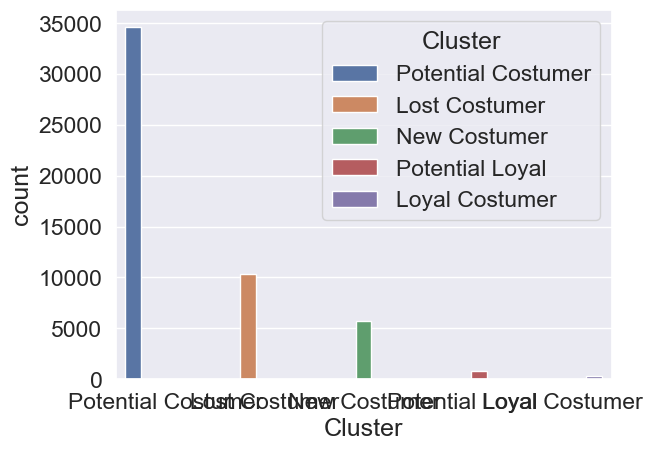

In [84]:
sns.barplot(data=cluster1,x='Cluster',y='count',hue='Cluster')

In [69]:
mf.loc[mf['Recency']<31]

Username  Recency  No Pesanan    amount  \
18                 *A*™| F*4(+62)082173570900        8           1  353300.0   
27                   7bdsfmaiq462895367928700       20           1  214000.0   
39                   813791214156281379121415       27           1  309430.0   
59                   877265402686287726540268       18           1  353080.0   
76            A Januar********8481 - 40579549        2           1  809800.0   
...                                       ...      ...         ...       ...   
51755          zidan*********0711 - 205722549       14           1  455800.0   
51759            zihan ayu lestari89639177088       11           1  675300.0   
51766           zuh rohtul aulia6281232043145       12           1  319000.0   
51772  zulfikar amri*********1245 - 139561285       27           1  348000.0   
51781           zura*********1714 - 220034062       28           1  372000.0   

       Recency_scale  No Pesanan_scale  amount_scale  value_rfm rank_rfm  \
18          4.854167               0.0      0.253568   5.107735        5   
27          4.604167               0.0      0.113568   4.717735        5   
39          4.458333               0.0      0.209477   4.667811        5   
59          4.645833               0.0      0.253347   4.899180        5   
76          4.979167               0.0      0.712362   5.691528        5   
...              ...               ...           ...        ...      ...   
51755       4.729167               0.0      0.356583   5.085750        5   
51759       4.791667               0.0      0.577186   5.368853        5   
51766       4.770833               0.0      0.219095   4.989929        5   
51772       4.458333               0.0      0.248241   4.706575        5   
51781       4.437500               0.0      0.272362   4.709862        5   

            Cluster  
18     New Costumer  
27     New Costumer  
39     New Costumer  
59     New Costumer  
76     New Costumer  
...             ...  
51755  New Costumer  
51759  New Costumer  
51766  New Costumer  
51772  New Costumer  
51781  New Costumer  

[6115 rows x 10 columns]

In [70]:
mf['Cluster'].value_counts()

Cluster
Potential Costumer    34607
Lost Costumer         10380
New Costumer           5748
Potential Loyal         781
Loyal Costumer          316
Name: count, dtype: int64

In [90]:
mf.loc[mf['Cluster']== 'Lost Costumer'].sort_values(by='Recency')

Username  Recency  No Pesanan  \
43416           Whisnu Albertus*********0404 - 211864644      169           1   
18837           Hajar iswanto Pratama******89 - 45775287      169           1   
10726               Dedy Tumpal*********9770 - 202527348      169           1   
30836                Ninik Handayani******54 - 209010954      169           1   
35114              Rembo Simangunsong******05 - 82912278      169           1   
...                                                  ...      ...         ...   
1336                    Adhika Ilman******27 - 273519793      241           1   
3950                      Alvin*********0000 - 212971141      241           1   
11198               Desy Puji Rahayu******56 - 177804258      241           1   
50765                   satullah*********4673 - 26515227      241           1   
28833  Muhammad Rifqie Al Fahmie*********7041 - 20953...      241           1   

          amount  Recency_scale  No Pesanan_scale  amount_scale  value_rfm  \
43416   108000.0            1.5               0.0      0.007035   1.507035   
18837   108000.0            1.5               0.0      0.007035   1.507035   
10726   108000.0            1.5               0.0      0.007035   1.507035   
30836   108000.0            1.5               0.0      0.007035   1.507035   
35114   108000.0            1.5               0.0      0.007035   1.507035   
...          ...            ...               ...           ...        ...   
1336    326000.0            0.0               0.0      0.226131   0.226131   
3950    332000.0            0.0               0.0      0.232161   0.232161   
11198   299000.0            0.0               0.0      0.198995   0.198995   
50765   300000.0            0.0               0.0      0.200000   0.200000   
28833  1200000.0            0.0               0.0      1.104523   1.104523   

      rank_rfm        Cluster  
43416        1  Lost Costumer  
18837        1  Lost Costumer  
10726        1  Lost Costumer  
30836        1  Lost Costumer  
35114        1  Lost Costumer  
...        ...            ...  
1336         1  Lost Costumer  
3950         1  Lost Costumer  
11198        1  Lost Costumer  
50765        1  Lost Costumer  
28833        1  Lost Costumer  

[10380 rows x 10 columns]

<Axes: xlabel='Recency', ylabel='amount'>

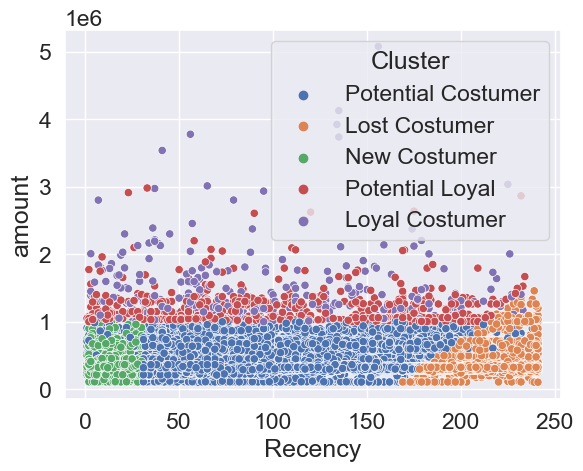

In [71]:
sns.scatterplot(data=mf,x='Recency',y='amount',hue='Cluster')

In [55]:
mf.loc[mf['rank_rfm']=='1'].sort_values(by='Recency')

Username  Recency  No Pesanan  \
43416           Whisnu Albertus*********0404 - 211864644      169           1   
18837           Hajar iswanto Pratama******89 - 45775287      169           1   
10726               Dedy Tumpal*********9770 - 202527348      169           1   
30836                Ninik Handayani******54 - 209010954      169           1   
35114              Rembo Simangunsong******05 - 82912278      169           1   
...                                                  ...      ...         ...   
1336                    Adhika Ilman******27 - 273519793      241           1   
3950                      Alvin*********0000 - 212971141      241           1   
11198               Desy Puji Rahayu******56 - 177804258      241           1   
50765                   satullah*********4673 - 26515227      241           1   
28833  Muhammad Rifqie Al Fahmie*********7041 - 20953...      241           1   

          amount  Recency_scale  No Pesanan_scale  amount_scale  value_rfm  \
43416   108000.0            1.5               0.0      0.007035   1.507035   
18837   108000.0            1.5               0.0      0.007035   1.507035   
10726   108000.0            1.5               0.0      0.007035   1.507035   
30836   108000.0            1.5               0.0      0.007035   1.507035   
35114   108000.0            1.5               0.0      0.007035   1.507035   
...          ...            ...               ...           ...        ...   
1336    326000.0            0.0               0.0      0.226131   0.226131   
3950    332000.0            0.0               0.0      0.232161   0.232161   
11198   299000.0            0.0               0.0      0.198995   0.198995   
50765   300000.0            0.0               0.0      0.200000   0.200000   
28833  1200000.0            0.0               0.0      1.104523   1.104523   

      rank_rfm  
43416        1  
18837        1  
10726        1  
30836        1  
35114        1  
...        ...  
1336         1  
3950         1  
11198        1  
50765        1  
28833        1  

[10380 rows x 9 columns]

C:\Users\12\AppData\Local\Temp\ipykernel_2056\4203958014.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\12\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='amount', ylabel='Density'>

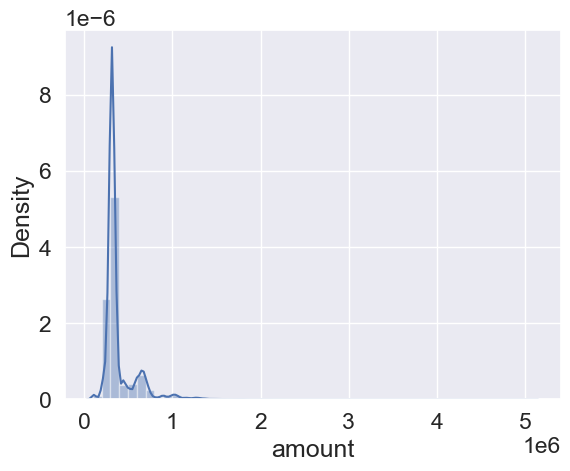

In [54]:
sns.distplot(mf['amount'])

C:\Users\12\AppData\Local\Temp\ipykernel_2056\562767011.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\12\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: ylabel='Density'>

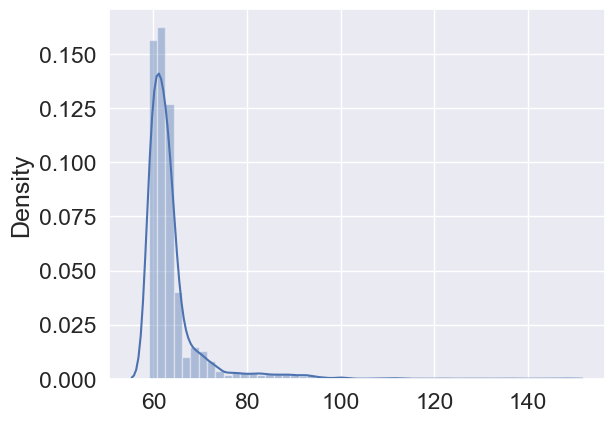

In [18]:
sns.distplot(mf.loc[mf['rank_rfm']=='5'][['Recency']])

<Axes: xlabel='No Pesanan', ylabel='amount'>

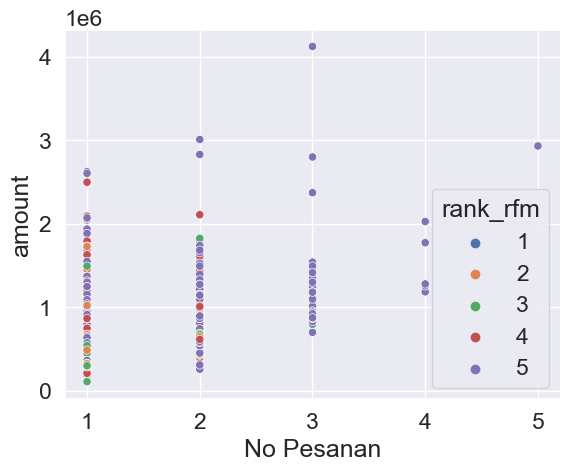

In [19]:
sns.scatterplot(data=mf,x='No Pesanan',y='amount',hue='rank_rfm')

In [173]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38681 entries, 0 to 38680
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Username          38681 non-null  object  
 1   Recency           38681 non-null  int64   
 2   No Pesanan        38681 non-null  int64   
 3   amount            38681 non-null  float64 
 4   Recency_scale     38681 non-null  float64 
 5   No Pesanan_scale  38681 non-null  float64 
 6   amount_scale      38681 non-null  float64 
 7   value_rfm         38681 non-null  float64 
 8   rank_rfm          38681 non-null  category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 2.4+ MB


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['4', '2', '2', ..., '2', '2', '3'], dtype=object)

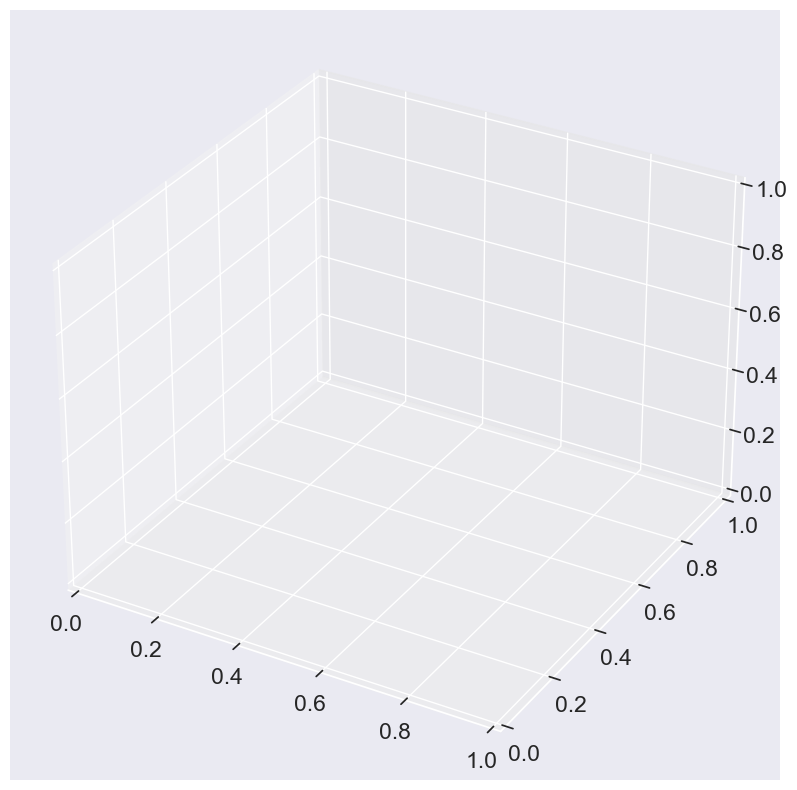

In [20]:
# Creating dataset
z = mf['Recency']
x = mf['No Pesanan']
y = mf['amount']

# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, c=mf['rank_rfm'])
ax.set_ylabel('Monatery')
ax.set_xlabel('Frequency')
ax.set_zlabel('Recency')
# show plot
plt.show()

In [ ]:
Loyal Costumer : pembel yang sudah melakukan pembelian > 1 dan nilai transaksi > Rp.1.000.000')
Petential Loyal : pembel yang sudah melakukan pembelian == 1 dan nilai transaksi > Rp.1.000.000')
Petential Costumer : pembeli dengan total nilai transaksi < Rp.1.000.000')
New Costumer : pembel yang sudah melakukan pembelian = 1 dan dengan waktu 30 hari trakhir')
Lost Costumer : pembel yang sudah melakukan pembelian 160 hari yang lalu')


# END OF RFM

In [10]:
dfx = df1.copy()
dfy = df2.copy()
dfz = df3.copy()
dfx = dfx.loc[dfx['amount']>0]
dfy = dfy.loc[dfy['amount']>0]
dfz = dfz.loc[dfz['amount']>0]
dfx['Qyear'] = pd.PeriodIndex(dfx.Date,freq="Q")
dfy['Qyear'] = pd.PeriodIndex(dfy.Date,freq="Q")
dfz['Qyear'] = pd.PeriodIndex(dfz.Date,freq="Q")
dfx = dfx.loc[(dfx['Qyear']=='2024Q1')]
dfy = dfy.loc[(dfy['Qyear']=='2023Q4')]
dfz = dfz.loc[(dfz['Qyear']=='2024Q2')]

dfg = pd.concat([dfx,dfy,dfz])
dfg['Month'] = dfg['Date'].dt.month
dfg['Year'] = dfg['Date'].dt.year
dfg['dateInt']=dfg['Year'].astype(str) + dfg['Month'].astype(str).str.zfill(2)
dfg['year month'] = pd.to_datetime(dfg['dateInt'], format='%Y%m')

In [14]:
max = dfg.groupby(['Username']).Date.max().reset_index()
min = dfg.groupby(['Username']).Date.min().reset_index()
fr = dfg.groupby(['Username'])['No Pesanan'].nunique().reset_index()

dfzz = pd.merge(min,max, how='outer', on=['Username'])
dfzz = pd.merge(fr,dfzz, how='outer', on=['Username'])

dfzz['Qyear1'] = pd.PeriodIndex(dfzz.Date_x,freq="Q")
dfzz['Qyear2'] = pd.PeriodIndex(dfzz.Date_y,freq="Q")

ren = dfzz.loc[dfzz['No Pesanan']>1]
ren1 = ren.loc[(ren['Qyear1']=='2024Q1')&(ren['Qyear2']=='2024Q2')]
ren2 = ren.loc[(ren['Qyear1']=='2024Q1')&(ren['Qyear2']=='2024Q1')]
ren3 = ren.loc[(ren['Qyear1']=='2024Q2')&(ren['Qyear2']=='2024Q2')]

In [15]:
dfzz

Username  No Pesanan  \
0                          ( Vina )******20 - 158487923           1   
1               (Guru Kimia) Anis Mugitsah6287833388350           1   
2      (Hanny.Fuji - Adm Security)******29 - 1109949619           1   
3           (Kuaro) Tita Erlanggawati******78 - 9457485           1   
4                 (Ramdhan) Rudi/Ela******95 - 32361929           1   
...                                                 ...         ...   
51028     | made pasek juni ariawan******32 - 127352467           1   
51029               | putu rustawan******80 - 100653329           1   
51030                                |*(+62)82311661209           1   
51031                          |*4 H*h(+62)082338165254           1   
51032                             “******23 - 275470785           1   

          Date_x     Date_y  Qyear1  Qyear2  
0     2024-04-01 2024-04-01  2024Q2  2024Q2  
1     2024-04-17 2024-04-17  2024Q2  2024Q2  
2     2024-03-23 2024-03-23  2024Q1  2024Q1  
3     2023-10-30 2023-10-30  2023Q4  2023Q4  
4     2023-12-11 2023-12-11  2023Q4  2023Q4  
...          ...        ...     ...     ...  
51028 2024-04-07 2024-04-07  2024Q2  2024Q2  
51029 2024-02-11 2024-02-11  2024Q1  2024Q1  
51030 2024-04-28 2024-04-28  2024Q2  2024Q2  
51031 2024-02-18 2024-02-18  2024Q1  2024Q1  
51032 2023-10-02 2023-10-02  2023Q4  2023Q4  

[51033 rows x 6 columns]

In [78]:
tabel_unique_costumer_a=dfg.loc[dfg['Qyear']=='2024Q1']['Username'].nunique()
tabel_unique_costumer_b=dfg.loc[dfg['Qyear']=='2024Q2']['Username'].nunique()
delta_unique_coustumer = tabel_unique_costumer_a-tabel_unique_costumer_b
new_costumer_a = dfzz.loc[dfzz['Qyear1']=='2024Q1']['Username'].count()
retention_costumer_a = ren1['Username'].count()+ren2['Username'].count()

avg_net_sales_a = dfg.loc[dfg['Qyear']=='2024Q1']['amount'].mean()
avg_frequency_a = dfg.loc[dfg['Qyear']=='2024Q1'].groupby(['Username'])['No Pesanan'].nunique().mean()
tot_gross_a = dfg.loc[dfg['Qyear']=='2024Q1']['amount'].sum()
tot_costumer_a = dfg.loc[dfg['Qyear']=='2024Q1']['Username'].count()
clv_a = round(tot_gross_a/tot_costumer_a*avg_frequency_a,0)

In [83]:
dfg.loc[dfg['Qyear']=='2024Q2']['Username'].nunique()

10984

In [85]:
ren1['Username'].count()+ren2['Username'].count()

788

In [86]:
avg_net_sales_a = dfg.loc[dfg['Qyear']=='2024Q2']['amount'].mean()
avg_frequency_a = dfg.loc[dfg['Qyear']=='2024Q2'].groupby(['Username'])['No Pesanan'].nunique().mean()
tot_gross_a = dfg.loc[dfg['Qyear']=='2024Q2']['amount'].sum()
tot_costumer_a = dfg.loc[dfg['Qyear']=='2024Q2']['Username'].count()
clv_a = round(tot_gross_a/tot_costumer_a*avg_frequency_a,0)
clv_a

366302.0

In [16]:
dfzz

Username  No Pesanan  \
0                          ( Vina )******20 - 158487923           1   
1               (Guru Kimia) Anis Mugitsah6287833388350           1   
2      (Hanny.Fuji - Adm Security)******29 - 1109949619           1   
3           (Kuaro) Tita Erlanggawati******78 - 9457485           1   
4                 (Ramdhan) Rudi/Ela******95 - 32361929           1   
...                                                 ...         ...   
51028     | made pasek juni ariawan******32 - 127352467           1   
51029               | putu rustawan******80 - 100653329           1   
51030                                |*(+62)82311661209           1   
51031                          |*4 H*h(+62)082338165254           1   
51032                             “******23 - 275470785           1   

          Date_x     Date_y  Qyear1  Qyear2  
0     2024-04-01 2024-04-01  2024Q2  2024Q2  
1     2024-04-17 2024-04-17  2024Q2  2024Q2  
2     2024-03-23 2024-03-23  2024Q1  2024Q1  
3     2023-10-30 2023-10-30  2023Q4  2023Q4  
4     2023-12-11 2023-12-11  2023Q4  2023Q4  
...          ...        ...     ...     ...  
51028 2024-04-07 2024-04-07  2024Q2  2024Q2  
51029 2024-02-11 2024-02-11  2024Q1  2024Q1  
51030 2024-04-28 2024-04-28  2024Q2  2024Q2  
51031 2024-02-18 2024-02-18  2024Q1  2024Q1  
51032 2023-10-02 2023-10-02  2023Q4  2023Q4  

[51033 rows x 6 columns]

In [75]:
dfz['Qyear'].unique()

<PeriodArray>
['2024Q2']
Length: 1, dtype: period[Q-DEC]

In [9]:
dfzz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51033 entries, 0 to 51032
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Username    51033 non-null  object        
 1   No Pesanan  51033 non-null  int64         
 2   Date_x      51033 non-null  datetime64[ns]
 3   Date_y      51033 non-null  datetime64[ns]
 4   Qyear1      51033 non-null  period[Q-DEC] 
 5   Qyear2      51033 non-null  period[Q-DEC] 
dtypes: datetime64[ns](2), int64(1), object(1), period[Q-DEC](2)
memory usage: 2.3+ MB


In [17]:
list_cluster = mf['Cluster'].values
list_cluster

NameError: name 'mf' is not defined

In [17]:
import re

BAD_CHARS = ['*']
pat = '|'.join(['({})'.format(re.escape(c)) for c in BAD_CHARS])

data_top_retention = dfzz[~dfzz['Username'].str.contains(pat)].sort_values(by='No Pesanan',ascending=False)
data_top_retention

C:\Users\12\AppData\Local\Temp\ipykernel_3420\100481649.py:6: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Username  No Pesanan     Date_x  \
19913                       IQBAL(+62)085711864270           5 2024-02-24   
46765                               f"1 rn(+62)817           5 2023-12-23   
24416                 Lorenzo Ribka(+62)8161615167           4 2024-03-23   
5665   Apridika Friskafauzi Wiguna(+62)82298638391           4 2024-04-01   
46856                fajar maulana(+62)82299272828           4 2023-12-21   
...                                            ...         ...        ...   
18045                         Grace A6285710095919           1 2024-03-05   
18047                  Grace Listyani6281380404318           1 2024-03-14   
18048      Grace Louistaria Larope(+62)87877753074           1 2023-10-04   
18049                     Grace Meily6283198374692           1 2024-05-10   
51006         | Made Bayu Wiraguna(+62)85156921210           1 2024-04-24   

          Date_y  Qyear1  Qyear2  
19913 2024-02-24  2024Q1  2024Q1  
46765 2023-12-27  2023Q4  2023Q4  
24416 2024-04-01  2024Q1  2024Q2  
5665  2024-04-01  2024Q2  2024Q2  
46856 2024-03-20  2023Q4  2024Q1  
...          ...     ...     ...  
18045 2024-03-05  2024Q1  2024Q1  
18047 2024-03-14  2024Q1  2024Q1  
18048 2023-10-04  2023Q4  2023Q4  
18049 2024-05-10  2024Q2  2024Q2  
51006 2024-04-24  2024Q2  2024Q2  

[14344 rows x 6 columns]

In [18]:
data_top_retention.to_excel(r'C:\Users\12\Downloads\data_top_retention(update).xlsx')

In [107]:
aa.to_excel(r'C:\Users\12\Downloads\RFM.xlsx')

In [15]:
dq2 = dfz.loc[(dfz['Date']>'2024-03-31')&(dfz['Date']<'2024-06-01')]

In [16]:
q21 = dq2.loc[(dq2['Nama Barang'].str.contains('Loom'))]
q21['jenis'] = 'Loom'
q22 = dq2.loc[(dq2['Nama Barang'].str.contains('Derby'))]
q22['jenis'] = 'Derby'
q23 = dq2.loc[(dq2['Nama Barang'].str.contains('Pebble'))]
q23['jenis'] = 'Pebble'

C:\Users\12\AppData\Local\Temp\ipykernel_8104\2772695746.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\12\AppData\Local\Temp\ipykernel_8104\2772695746.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\12\AppData\Local\Temp\ipykernel_8104\2772695746.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [18]:
dfaa = pd.concat([q21,q22,q23])

In [19]:
dfaa.to_excel(r'Derby, Loom, Paddle 2024Q2.xlsx')

In [14]:
dq2

SKU                   Nama Barang  \
27775  PSD0648OLV-NN-36       Loom Sandal Olive Women   
27778  PSD0648OLV-NN-36       Loom Sandal Olive Women   
27779  SSY0102BLK-DM-41          Original Derby Black   
27783  SSY0102BLK-DM-43          Original Derby Black   
27793  PSD0648AGR-NN-42        Loom Sandal Army Green   
...                 ...                           ...   
46738  PLH4006TNS-CR-41              Pebble Suede Tan   
46740  SSY0102BLK-DM-43          Original Derby Black   
46742  PSD0648AGR-NN-42        Loom Sandal Army Green   
46743  SSY0102BLK-DM-40          Original Derby Black   
46745  SLH0102BLK-DM-42  Original Derby Boots Leather   

                           No Pesanan             Tanggal  \
27775               SP-240403QX2VH0WP   4/3/2024 12:49:00   
27778     TT-576768061308699953-84986   4/2/2024 13:48:00   
27779               SP-240403QX689H3G   4/3/2024 12:51:00   
27783  TP-INV/20240419/MPL/3861385857  4/19/2024 11:42:00   
27793               SP-240402NGWPPTC8   4/2/2024 13:52:00   
...                               ...                 ...   
46738               SP-240531S5NPC2SA  5/31/2024 21:31:00   
46740               SP-240531S5PTKB6W  5/31/2024 21:32:00   
46742               SP-240531S66UNDYT  5/31/2024 21:41:00   
46743               SP-240531S66DD0A9  5/31/2024 21:47:00   
46745               SP-240531PUGXKUPX  5/31/2024 22:03:00   

                   Pelanggan                    No Telp  QTY    amount  \
27775                 Rahmah        ******36 - 34886218  1.0  319000.0   
27778               machatha           (+62)81546883072  1.0  268800.0   
27779        Rinaldi Ferdian       ******26 - 239953971  1.0  364000.0   
27783               Dewa Aji  *********4168 - 101955617  1.0  364000.0   
27793           Deka Sanjaya        ******82 - 85567024  2.0  638000.0   
...                      ...                        ...  ...       ...   
46738                   Umar              6287883798277  1.0  455800.0   
46740             DREAM CELL              6281273797332  1.0  375100.0   
46742                   Isma              6287855331110  1.0  328800.0   
46743                    Vio              6285878050748  1.0  375100.0   
46745  khoerul Falah (apang)              6289688867962  1.0  695700.0   

          Sumber                   Nama Toko      Status  \
27775     SHOPEE  Portee Goods Official Shop   COMPLETED   
27778     TIKTOK                Portee Goods   COMPLETED   
27779     SHOPEE  Portee Goods Official Shop   COMPLETED   
27783  TOKOPEDIA                Portee Goods   COMPLETED   
27793     SHOPEE  Portee Goods Official Shop   COMPLETED   
...          ...                         ...         ...   
46738     SHOPEE  Portee Goods Official Shop  PROCESSING   
46740     SHOPEE  Portee Goods Official Shop  PROCESSING   
46742     SHOPEE  Portee Goods Official Shop  PROCESSING   
46743     SHOPEE  Portee Goods Official Shop  PROCESSING   
46745     SHOPEE  Portee Goods Official Shop  PROCESSING   

                                       Catatan Harga Jual  Diskon  \
27775                                      NaN     560000  241000   
27778                                      NaN     560000  291200   
27779                                      NaN     560000  196000   
27783                                      NaN     364000       0   
27793                                      NaN     560000  482000   
...                                        ...        ...     ...   
46738                                      NaN        NaN     NaN   
46740                                      NaN        NaN     NaN   
46742                                      NaN        NaN     NaN   
46743  cel dlu sblm kirim, size 40 warna black        NaN     NaN   
46745                                      NaN        NaN     NaN   

      Extra Discount                             Username       Date   Qyear  \
27775              0            Rahmah******36 - 34886218 2024-04-03  2024Q2   
277

# Range Retention

In [55]:
df1 = dfx.loc[(dfx['Qyear']=='2024Q1')]
df2 = dfy.loc[(dfy['Qyear']=='2023Q4')|(dfy['Qyear']=='2023Q3')]
df3 = dfw.loc[(dfw['Qyear']=='2024Q2')]

dfz = pd.concat([df1,df2,df3])
columns = dfz.columns
# dfz = dfz.drop_duplicates(subset=columns)
dfz = dfz.loc[(dfz['amount']>99000)]
dfz['Month'] = dfz['Date'].dt.month
dfz['Year'] = dfz['Date'].dt.year
dfz['dateInt']=dfz['Year'].astype(str) + dfz['Month'].astype(str).str.zfill(2)
dfz['year month'] = pd.to_datetime(dfz['dateInt'], format='%Y%m')
dfz = dfz.loc[dfz['Sumber'].str.contains('INTERNAL') == False]
dfz = dfz.loc[dfz['amount']>0]

In [56]:
dfz = dfz.drop_duplicates(subset='No Pesanan')

In [57]:
list = dfz['Username'].value_counts().reset_index()
list = list.loc[list['count']>1]['Username'].values

In [58]:
dfz = dfz.loc[dfz['Username'].isin(list)]
dfz = dfz.sort_values(by=['Username','Date'])

In [59]:
dfz['Diff Date']=dfz['Date'].shift(-1)-dfz['Date']
dfz['Diff Date']=dfz['Diff Date'].dt.days

In [60]:
dfz = dfz.loc[dfz['Diff Date']>0]

c:\Users\12\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



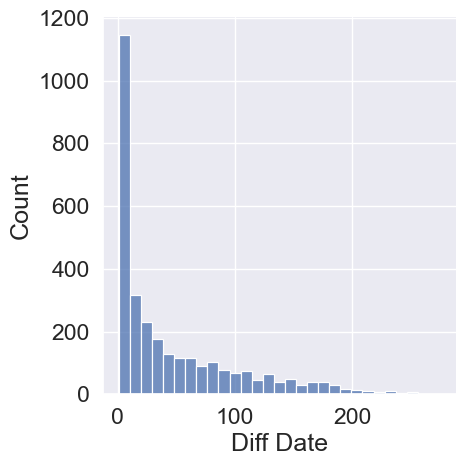

In [62]:
sns.displot(dfz['Diff Date'])

In [67]:
dfz['Diff Date'].describe()

count    3040.000000
mean       46.497039
std        54.582606
min         1.000000
25%         5.000000
50%        22.000000
75%        74.000000
max       275.000000
Name: Diff Date, dtype: float64

In [71]:
dfz['Diff Date'].value_counts().head(50)

Diff Date
3.0     177
1.0     166
2.0     166
4.0     139
5.0     129
7.0      97
6.0      95
8.0      71
10.0     58
9.0      48
11.0     48
12.0     47
17.0     45
13.0     42
15.0     33
23.0     31
14.0     29
38.0     28
31.0     27
22.0     26
20.0     26
21.0     25
24.0     25
19.0     24
18.0     24
16.0     23
28.0     22
29.0     22
35.0     22
25.0     21
75.0     21
34.0     20
62.0     19
27.0     19
30.0     18
45.0     18
36.0     17
53.0     17
32.0     16
33.0     16
39.0     16
80.0     16
56.0     16
47.0     16
49.0     16
57.0     15
70.0     15
50.0     14
65.0     14
61.0     14
Name: count, dtype: int64

In [74]:
dfz[100:150]

SKU                              Nama Barang  \
1871   PEQ2199BLK-NN-NN                                Shoe care   
14515  PSD0648BLK-NN-41                        Loom Sandal Black   
15574  PSD0648KPR-NN-36           Loom Sandal Khaki Purple Women   
18504  PSD0648GRP-NN-38              Loom Sandal Grey Pink Women   
24160  PSD0648BLK-NN-41                        Loom Sandal Black   
25196  PSD0648GRP-NN-38              Loom Sandal Grey Pink Women   
15529  PSD0648RBW-NN-36          Loom Sandal Rainbow White Women   
16041  SSY0102BLK-DM-40                     Original Derby Black   
8977   SPT0312BLK-JT-41         Loafers Slippers Black RL Series   
10184  PSD0648KHP-NN-38             loom Sandal White Pink Women   
12837  PSD0648KPR-NN-39           Loom Sandal Khaki Purple Women   
24264  PSD0650RBW-NN-29       Loom Sandal Rainbow White For Kids   
27408  PSD0648OLV-NN-37                  Loom Sandal Olive Women   
14470  SLH0102BLK-DM-40             Original Derby Boots Leather   
7995   PLT0254BLK-JB-41       Oxford Captoe Wax Laces Lite Black   
30083  SSY0102BLK-DM-44                     Original Derby Black   
4730   SSY0102BLK-DM-43                     Original Derby Black   
25120   LKBG0001STD-CHB                           ELKA Beyza Bag   
17776  SSY0310BLK-DM-41                   Original Loafers Black   
18921  SSY0310BLK-DM-42                   Original Loafers Black   
14775  PSD0648OLV-NN-42                        Loom Sandal Olive   
23417     LKSN0077DTA-S  Sandal Kulit Asli Monk Sandals LTHRKRFT   
7043   PSD0648BLK-NN-39                        Loom Sandal Black   
8948   PCL0202BLN-LR.41              Oxford Captoe Brogues Black   
11211  PLF0106BLK-RB.41                Derby Long Moc Life Black   
24299  PSD0648RBW-NN-38          Loom Sandal Rainbow White Women   
7083   SSY0102BLK-DM-41                     Original Derby Black   
10413  SSY0102BLK-DM-40                     Original Derby Black   
13156  SSY0310BLK-DM-44                   Original Loafers Black   
27910  SSY0102BLK-DM-42                     Original Derby Black   
9252   SSY0102BLK-DM-42                     Original Derby Black   
27540  PSD0648BLK-NN-42                        Loom Sandal Black   
28654  PSD0648TAN-NN-36                    Loom Sandal Tan Women   
419    PSD0648RBW-NN-38          Loom Sandal Rainbow White Women   
11652  PSD0648KPR-NN-38           Loom Sandal Khaki Purple Women   
1046   PSD0648RBW-NN-38         Loom Sandals Women Rainbow White   
31282  SSY0102BLK-DM-41                     Original Derby Black   
5816   SSY0102BLK-DM-40                     Original Derby Black   
1152   PSD0650BLK-NN-27               Loom Sandal Black for Kids   
978    PSD0650BLK-NN-31               Loom Sandal Black for Kids   
7404   PSD0648BLK-NN-44                        Loom Sandal Black   
9866   SSY0310BLK-DM-43                   Original Loafers Black   
2994   SSY2711BSH-TB-40  Monolith Adjustable Loafers Black Shine   
5727   PSD0648WHK-NN-38            Loom Sandal White Khaki Women   
96     PSD0650RBW-NN-27      Loom Sandals Rainbow White for Kids   
1037   PSD0643BLK-BS-42                      Milano Sandal Black   
27304  SSY0102BLK-DM-41                     Original Derby Black   
3070   PSD0648GRP-NN-40             Loom Sandals Women Grey Pink   
2754   PSD0650RBW-NN-33      Loom Sandals Rainbow White for Kids   
5107   PSD0650RBW-NN-31      Loom Sandals Rainbow White for Kids   

                           No Pesanan             Tanggal  \
1871                SP-240120CWYD2DTC   20/Jan/2024 17:08   
14515               SP-231101FCQR9G3T   01/Nov/2023 16:11   
15574               SP-231105S075NG7U    5/Nov/2023 12:34   
18504               SP-231116QA7MXERN    16/Nov/2023 9:38   
24160               SP-23120258X6MTXW    02/Dec/2023 8:56   
25196               SP-231204ATQTH6FB   04/Dec/2023 13:58   
15529  TP-INV/20240505/MPL/3889304163   5/5/2024 17:29:00   
16041               SP-231107VP4BE0C4   06/Nov/2023 23:04   
89